# 📗 中級：応用問題編（グラフ分析・groupby・pivot_table・可視化）

Pandasを活用した集計処理・グルーピング・可視化の実践演習です。
※演習問題 → 解答例 の形式で構成されています。

## 🔸準備：架空の売上データを作成

In [1]:
import pandas as pd

sales_data = pd.DataFrame({
    '日付': pd.date_range(start='2024-01-01', periods=10, freq='D'),
    '商品カテゴリ': ['A', 'B', 'A', 'C', 'B', 'C', 'A', 'B', 'A', 'C'],
    '商品名': ['商品1', '商品2', '商品1', '商品3', '商品2', '商品3', '商品1', '商品2', '商品1', '商品3'],
    '売上金額': [1000, 1500, 1200, 1800, 1400, 2000, 1100, 1600, 1300, 1900]
})
sales_data

,日付,商品カテゴリ,商品名,売上金額
0,2024-01-01,A,商品1,1000
1,2024-01-02,B,商品2,1500
2,2024-01-03,A,商品1,1200
3,2024-01-04,C,商品3,1800
4,2024-01-05,B,商品2,1400
5,2024-01-06,C,商品3,2000
6,2024-01-07,A,商品1,1100
7,2024-01-08,B,商品2,1600
8,2024-01-09,A,商品1,1300
9,2024-01-10,C,商品3,1900


## Q1: 商品カテゴリごとの売上合計を求めてください

In [ ]:
# 👇 自分で書いてみましょう

✅ 解答例

In [2]:
sales_data.groupby('商品カテゴリ')['売上金額'].sum()

商品カテゴリ
A    4600
B    4500
C    5700
Name: 売上金額, dtype: int64

In [3]:
sales_data.groupby('商品カテゴリ')['売上金額'].sum().sort_values(ascending=False)

商品カテゴリ
C    5700
A    4600
B    4500
Name: 売上金額, dtype: int64

<Axes: title={'center': '商品カテゴリ別 売上金額'}, xlabel='商品カテゴリ'>

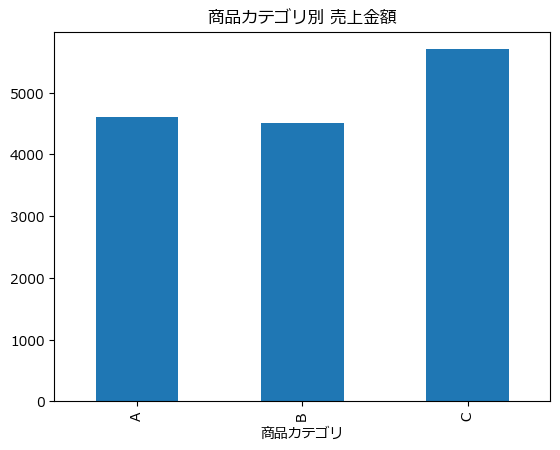

In [5]:
import matplotlib.pyplot as plt
import matplotlib

# 日本語対応フォントに変更（例：MS Gothic, Meiryo, Yu Gothic など）
matplotlib.rcParams['font.family'] = 'Meiryo'  # ←ここを変更


sales_data.groupby('商品カテゴリ')['売上金額'].sum().plot(kind='bar', title='商品カテゴリ別 売上金額')

In [6]:
sales_summary = sales_data.groupby('商品カテゴリ', as_index=False)['売上金額'].sum()
print(sales_summary)

  商品カテゴリ  売上金額
0      A  4600
1      B  4500
2      C  5700


## Q2: 商品カテゴリごとの売上平均を求めてください

In [ ]:
# 👇 自分で書いてみましょう

✅ 解答例

In [7]:
sales_data.groupby('商品カテゴリ')['売上金額'].mean()

商品カテゴリ
A    1150.0
B    1500.0
C    1900.0
Name: 売上金額, dtype: float64

## Q3: pivot_tableでカテゴリ×商品名ごとの売上合計を表示してください

In [ ]:
# 👇 自分で書いてみましょう

✅ 解答例

In [8]:
sales_data.pivot_table(values='売上金額', index='商品カテゴリ', columns='商品名', aggfunc='sum', fill_value=0)

商品名,商品1,商品2,商品3
商品カテゴリ,,,
A,4600,0,0
B,0,4500,0
C,0,0,5700


## Q4: 日別売上推移を折れ線グラフで可視化してください

In [ ]:
# 👇 自分で書いてみましょう

✅ 解答例

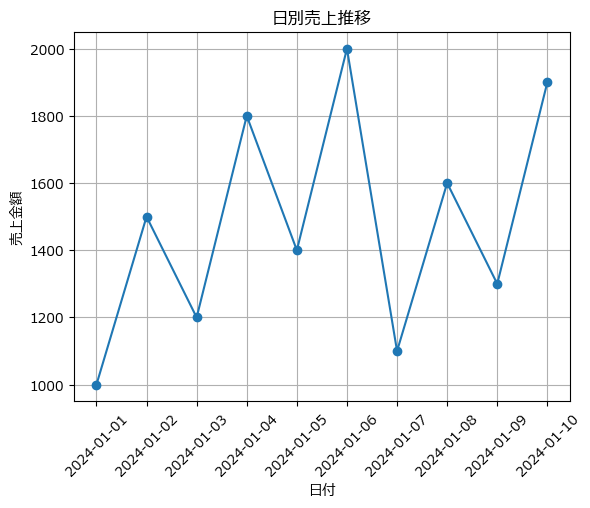

In [9]:
import matplotlib.pyplot as plt
plt.plot(sales_data['日付'], sales_data['売上金額'], marker='o')
plt.title('日別売上推移')
plt.xlabel('日付')
plt.ylabel('売上金額')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

## Q5: 商品カテゴリ別の売上合計を棒グラフで表示してください

In [ ]:
# 👇 自分で書いてみましょう

✅ 解答例

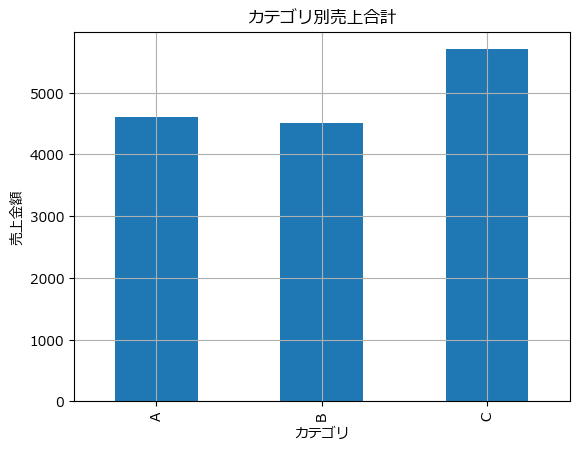

In [10]:
category_sales = sales_data.groupby('商品カテゴリ')['売上金額'].sum()
category_sales.plot(kind='bar', title='カテゴリ別売上合計', xlabel='カテゴリ', ylabel='売上金額')
plt.grid(True)
plt.show()